# Wine quality parameter analysis 

## Goals:

1. Understand the dataset I am dealing with
2. Test 3 models for wine quality prediction
3. Understand the most relevant models

### 1. Exploratory Data Analysis

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

#### 1. Import data

In [7]:
df_red_wine = pd.read_csv('winequality-red.csv', sep=';')
df_white_wine = pd.read_csv('winequality-white.csv', sep=';')

#### 2. Describe datasets

In [6]:
df_red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df_white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Just from having a general overview on the datasets, we undestand:

1. There 11 parameters measured for quality.
2. The average quality is below the median for both wines.

#### 3. Check for Nulls

In [23]:
df_red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All the values for the red wine dataset are non-null.

In [24]:
df_white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


#### 4. Check for duplicates

In [30]:
print('Number of duplicates =' + ' ' + str(sum(df_red_wine.duplicated())))

Number of duplicates = 240


In [29]:
print('Number of duplicates =' + ' ' + str(sum(df_white_wine.duplicated())))

Number of duplicates = 937


The number of duplicates is:
    
    - 240 for the red wine dataset.
    - 937 for the white wine dataset
    
We will now remove them and re-check.

In [31]:
df_red_wine = df_red_wine[-df_red_wine.duplicated()]

In [32]:
print('Number of duplicates =' + ' ' + str(sum(df_red_wine.duplicated())))

Number of duplicates = 0


In [33]:
df_white_wine = df_white_wine[-df_white_wine.duplicated()]

In [34]:
print('Number of duplicates =' + ' ' + str(sum(df_white_wine.duplicated())))

Number of duplicates = 0


The number of duplicates is now null, so we can proceed the analysis.

#### 5. Plot data distributions

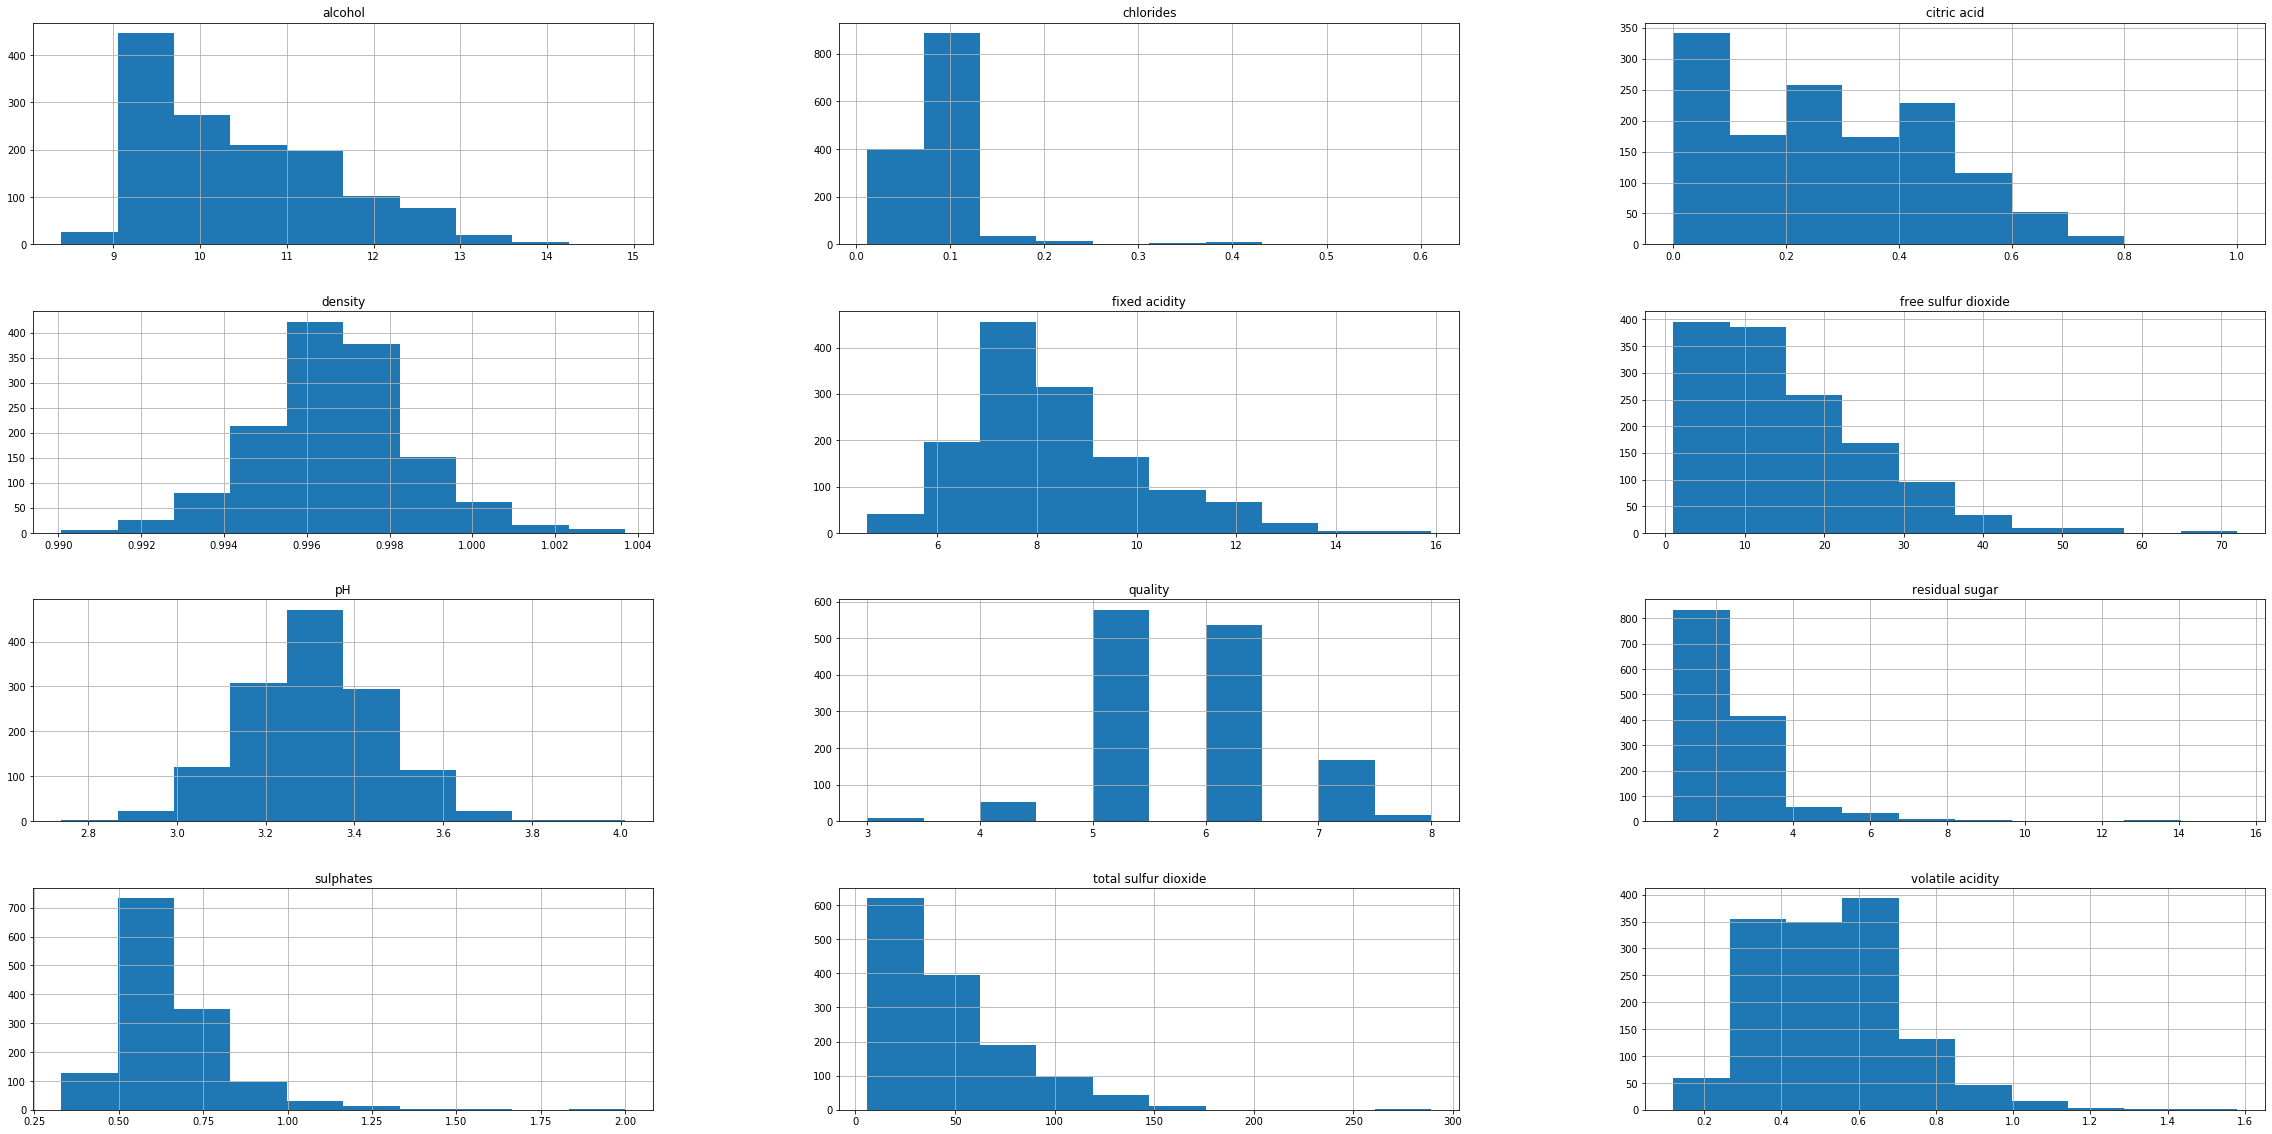

In [35]:
df_red_wine.hist()
plt.rcParams['figure.figsize'] = [40, 20]
plt.show()

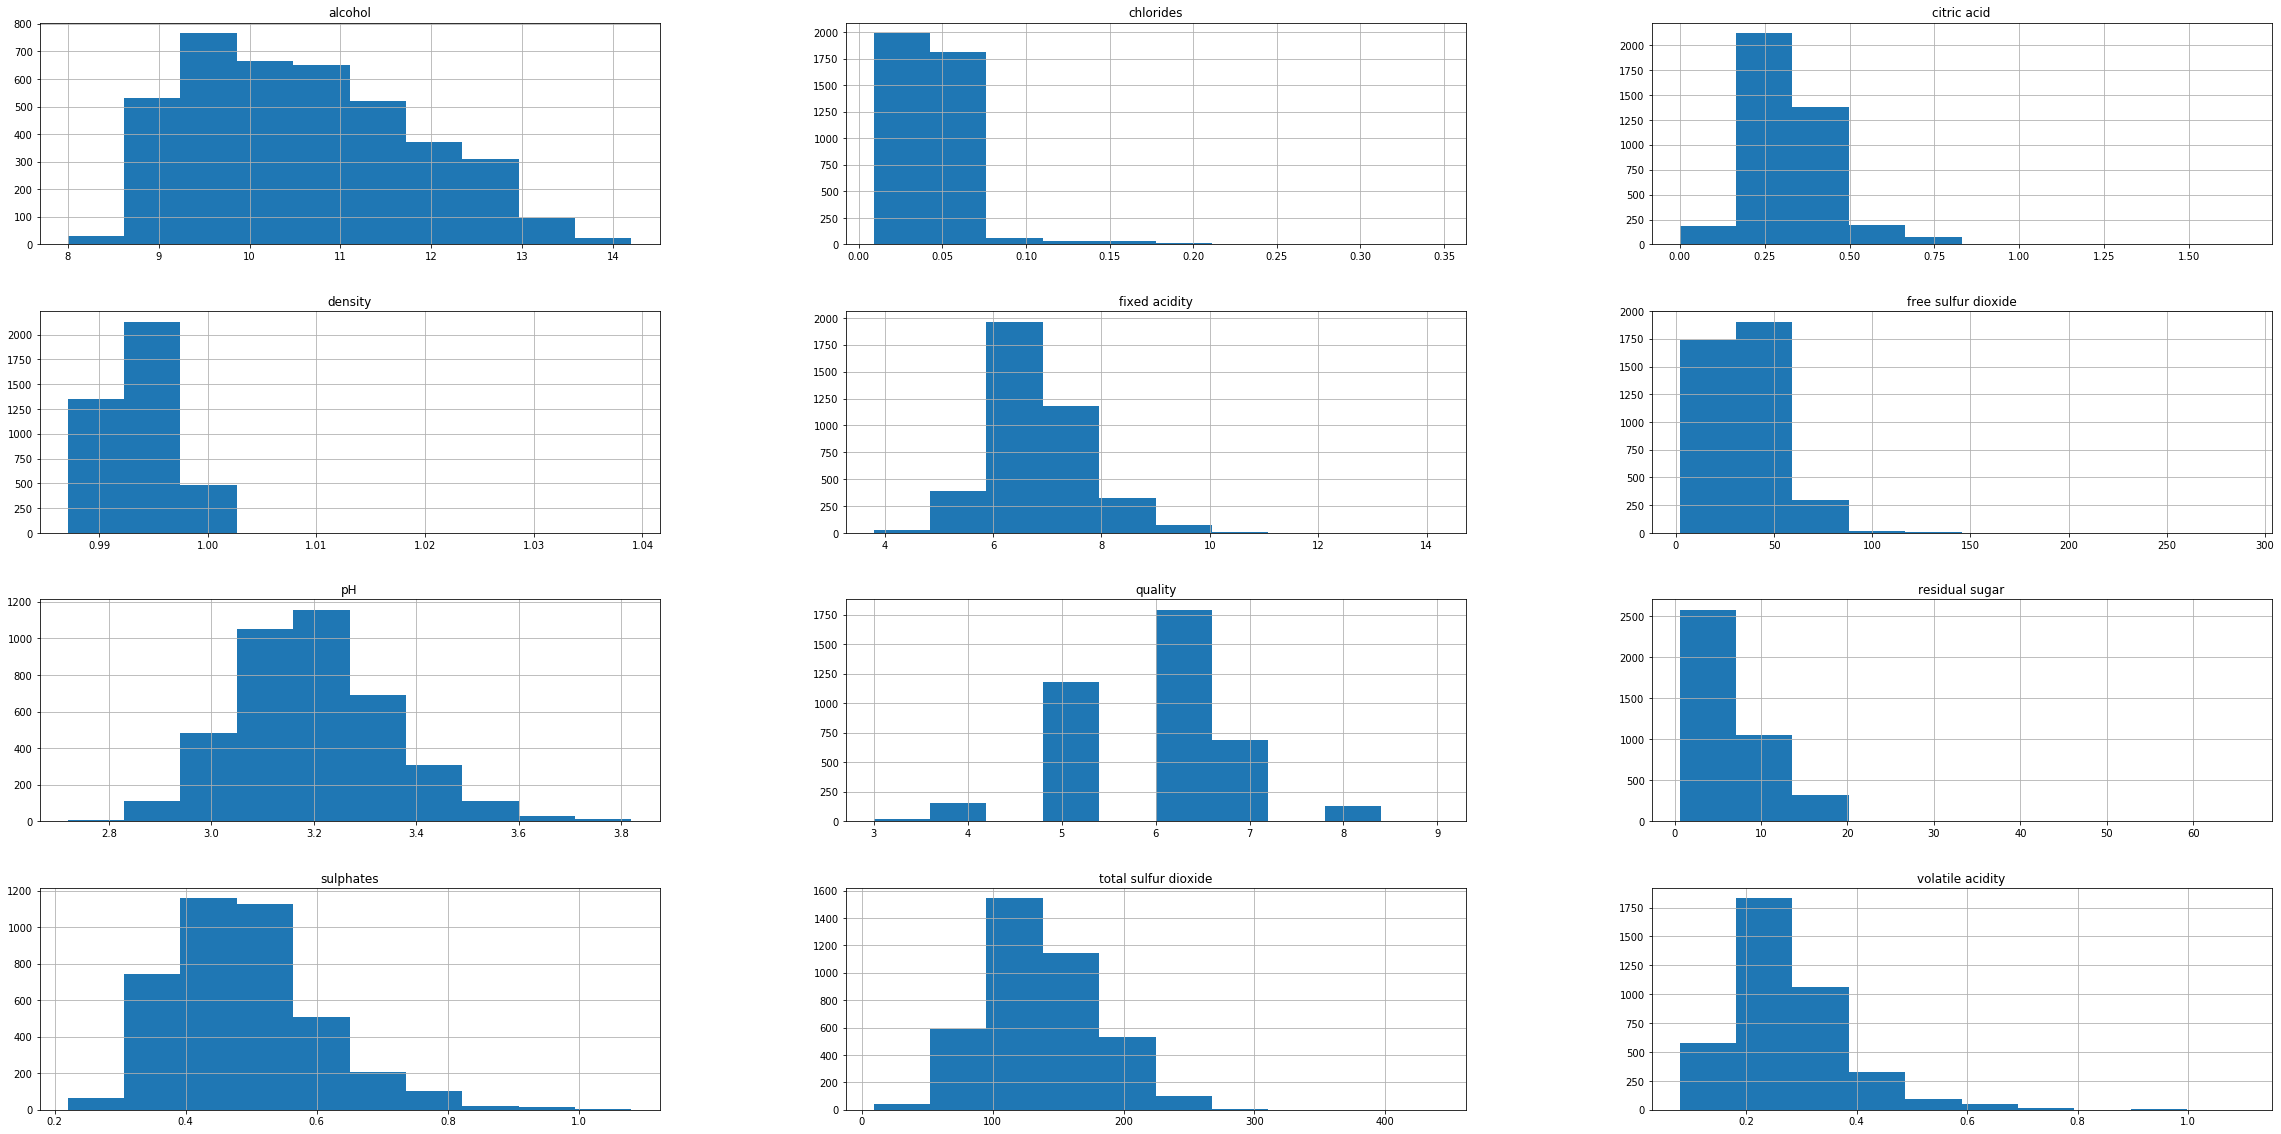

In [36]:
df_white_wine.hist()
plt.rcParams['figure.figsize'] = [40, 20]
plt.show()

Looking at the data distributions we can infer two things:

1. The datasets have different distributions for each variable.
2. None of the features has a normal distributions, so I can not use algorithms that make this assumption.

#### 6. Plot auto-correlation heatmaps

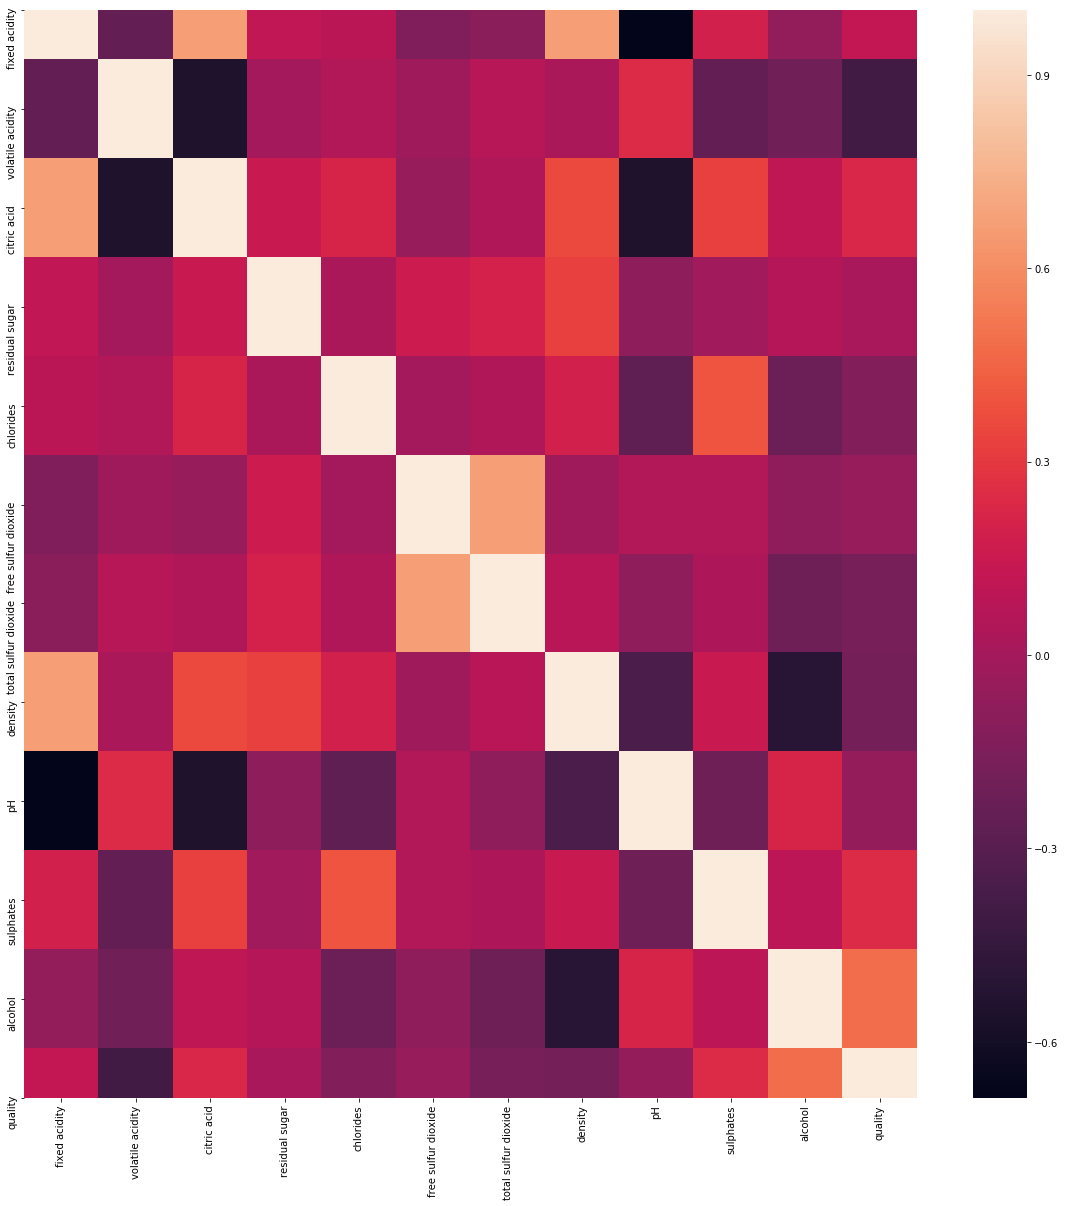

In [50]:
sns.heatmap(df_red_wine.corr())
plt.rcParams['figure.figsize'] = [50, 50]
plt.show()

In red wines:

1. Quality has a higher correlation with volatile acidity and alcohol.
2. I will check further if this makes sense.

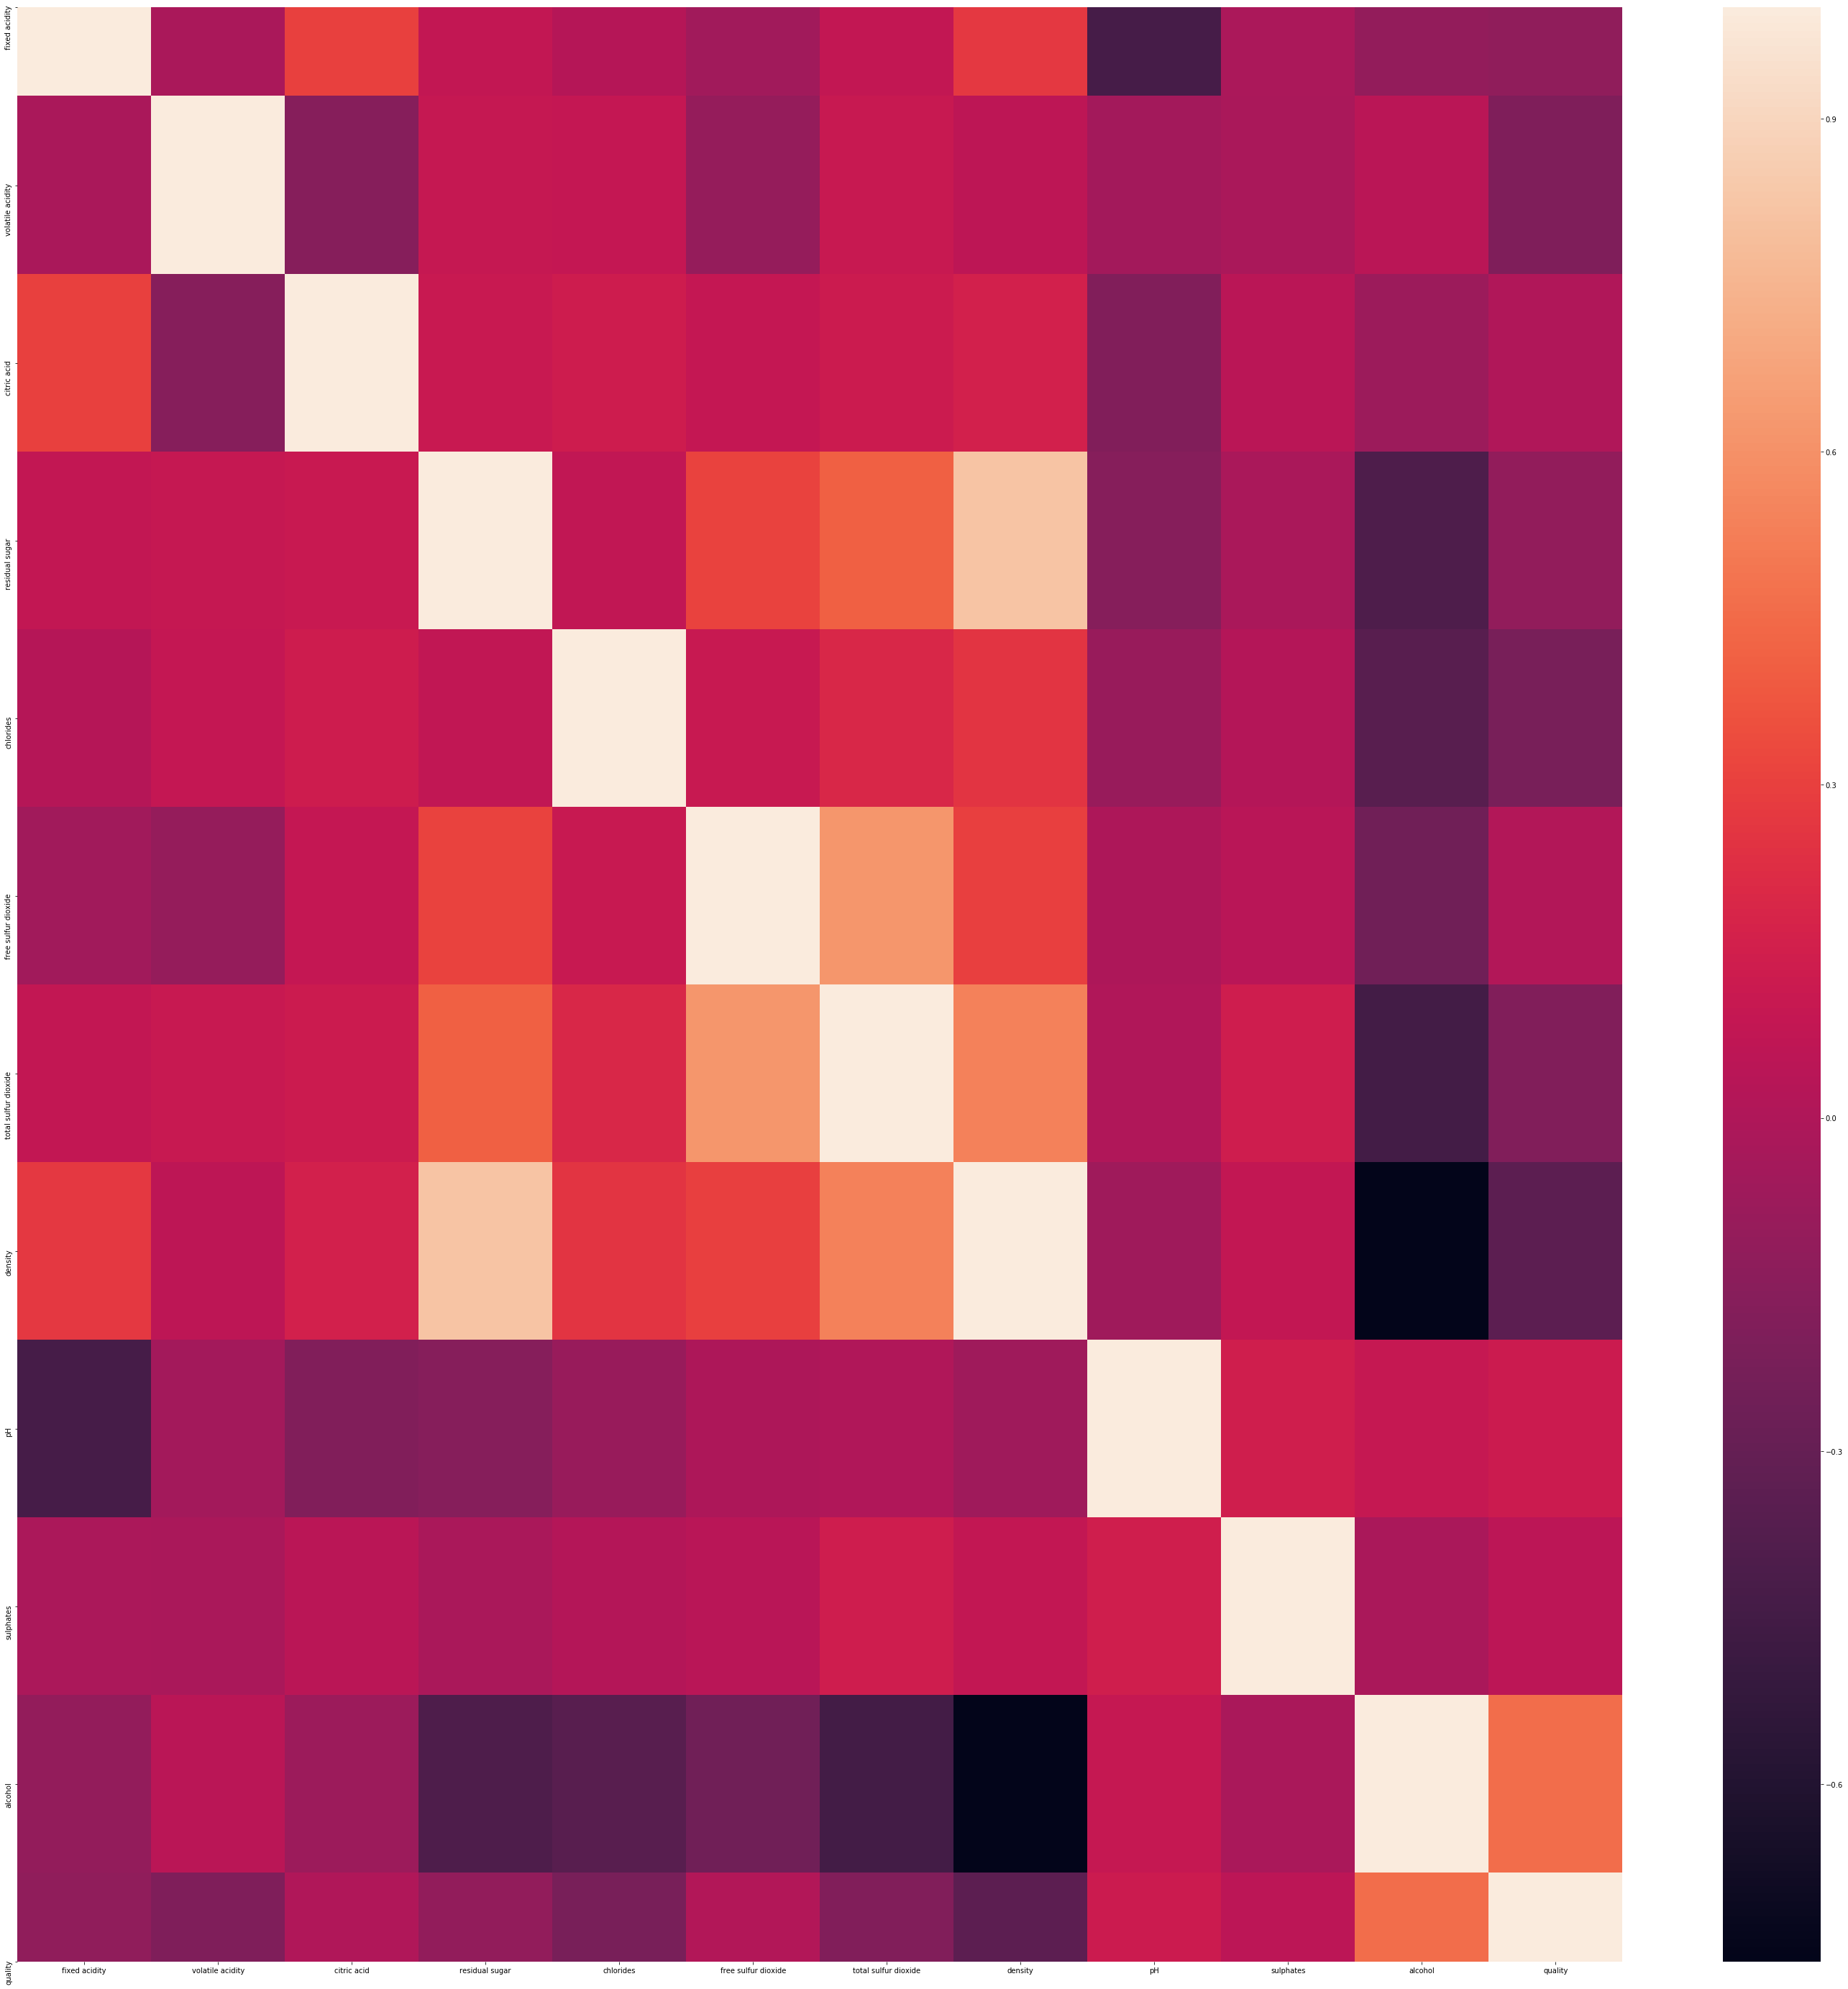

In [51]:
sns.heatmap(df_white_wine.corr())
plt.rcParams['figure.figsize'] = [50, 50]
plt.show()

In white wines:

1. Quality still has higher correlation with alcohol. Contrary to red wines, there is no high correlation with volatile acidity.
2. Check this alcohol relationship further.

#### 7. Scatter Matrix